<a href="https://colab.research.google.com/github/dhanish777/ML-Projects/blob/main/MusicLyrics_SentimentAnalysisandClustering_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Musical Sentiments: Clustering Lyrics for Deeper Insights using NLP and t-SNE


The aim of this project is to analyze the sentiment of music lyrics and identify thematic clusters using Natural Language Processing (NLP) techniques and clustering algorithms. The dataset comprises lyrics from various artists and tracks, along with additional metadata such as genre and release date

### Methods used :

Data preprocessing, sentiment analysis using a pre-trained model, TF-IDF vectorization, PCA and t-SNE dimensionality reduction (for comparison), and K-Means clustering.

In [ ]:
import pandas as pd


lyrics_df = pd.read_csv(r"C:\Users\dhani\Downloads\lyricsdataset.csv")

lyrics_df.head(10)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0
5,14,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,...,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.0
6,15,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,...,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.0
7,17,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,...,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.0
8,20,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,...,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.0
9,23,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,...,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.0


In [ ]:

print(lyrics_df.isnull().sum())



Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64


In [ ]:
print(lyrics_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [ ]:
lyrics_df = lyrics_df.drop(columns=['Unnamed: 0'])

In [ ]:
lyrics_df.head(10)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0
5,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,0.074078,...,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.0
6,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,0.040712,...,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.0
7,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,0.002506,...,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.0
8,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,0.248273,...,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.0
9,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,0.053944,...,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()


    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])


    words = word_tokenize(text)


    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return cleaned_text

lyrics_df['cleaned_lyrics'] = lyrics_df['lyrics'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

lyrics_df[['lyrics', 'cleaned_lyrics']].head()

,lyrics,cleaned_lyrics
0,hold time feel break feel untrue convince spea...,hold time feel break feel untrue convince spea...
1,believe drop rain fall grow believe darkest ni...,believe drop rain fall grow believe darkest ni...
2,sweetheart send letter goodbye secret feel bet...,sweetheart send letter goodbye secret feel bet...
3,kiss lips want stroll charm mambo chacha merin...,kiss lip want stroll charm mambo chacha mering...
4,till darling till matter know till dream live ...,till darling till matter know till dream live ...


#### Sentiment Analysis with VADER

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
lyrics_df['sentiment'] = lyrics_df['cleaned_lyrics'].apply(get_sentiment)

lyrics_df[['cleaned_lyrics', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_lyrics,sentiment
0,hold time feel break feel untrue convince spea...,positive
1,believe drop rain fall grow believe darkest ni...,negative
2,sweetheart send letter goodbye secret feel bet...,positive
3,kiss lip want stroll charm mambo chacha mering...,positive
4,till darling till matter know till dream live ...,positive


#### Feature Extraction and Vectorization with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics_df['cleaned_lyrics'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

print(tfidf_df.head())


   aaaah  aaah  abandon  abide  ability  ablaze  able  aboard  absolute  \
0    0.0   0.0      0.0    0.0      0.0     0.0   0.0     0.0       0.0   
1    0.0   0.0      0.0    0.0      0.0     0.0   0.0     0.0       0.0   
2    0.0   0.0      0.0    0.0      0.0     0.0   0.0     0.0       0.0   
3    0.0   0.0      0.0    0.0      0.0     0.0   0.0     0.0       0.0   
4    0.0   0.0      0.0    0.0      0.0     0.0   0.0     0.0       0.0   

   absolutely  ...  zagga  zero  zilla  zimbabwe  zing  zinga  zion  zombie  \
0         0.0  ...    0.0   0.0    0.0       0.0   0.0    0.0   0.0     0.0   
1         0.0  ...    0.0   0.0    0.0       0.0   0.0    0.0   0.0     0.0   
2         0.0  ...    0.0   0.0    0.0       0.0   0.0    0.0   0.0     0.0   
3         0.0  ...    0.0   0.0    0.0       0.0   0.0    0.0   0.0     0.0   
4         0.0  ...    0.0   0.0    0.0       0.0   0.0    0.0   0.0     0.0   

   zone  zoom  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   

### Applying Clustering on the data using PCA and K-Means (Method 1)

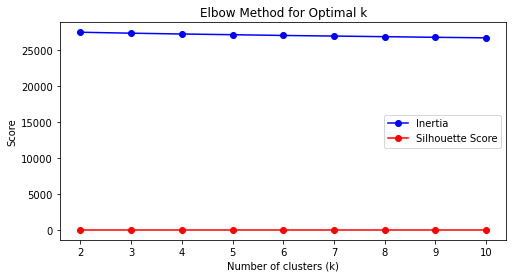

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()


In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
lyrics_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

print(lyrics_df[['cleaned_lyrics', 'sentiment', 'cluster']].head())


                                      cleaned_lyrics sentiment  cluster
0  hold time feel break feel untrue convince spea...  positive        1
1  believe drop rain fall grow believe darkest ni...  negative        3
2  sweetheart send letter goodbye secret feel bet...  positive        3
3  kiss lip want stroll charm mambo chacha mering...  positive        1
4  till darling till matter know till dream live ...  positive        3


Silhouette Score for k=5: 0.0028357065652215917


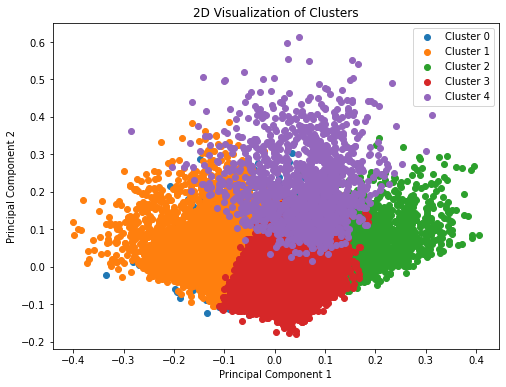

In [ ]:
silhouette_avg = silhouette_score(tfidf_matrix, lyrics_df['cluster'])
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

pca_df = pd.DataFrame(tfidf_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = lyrics_df['cluster']

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Clusters')
plt.legend()
plt.show()


### using TSNE for dimension reduction and then applying K means to cluster

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix)

tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])

lyrics_df = pd.concat([lyrics_df, tsne_df], axis=1)

print(lyrics_df[['tsne_1', 'tsne_2']].head())


      tsne_1     tsne_2
0  -6.640282 -40.059872
1  38.739597 -21.488689
2  26.996611 -46.404293
3  47.789337   4.791354
4  27.549696  -4.413720


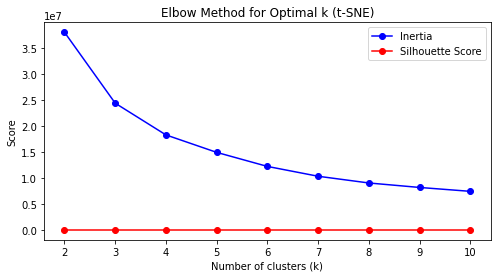

In [ ]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tsne_results, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Method for Optimal k (t-SNE)')
plt.legend()
plt.show()


In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
lyrics_df['cluster_tsne'] = kmeans.fit_predict(tsne_results)

print(lyrics_df[['tsne_1', 'tsne_2', 'cluster_tsne']].head())


      tsne_1     tsne_2  cluster_tsne
0  -6.640282 -40.059872             4
1  38.739597 -21.488689             0
2  26.996611 -46.404293             4
3  47.789337   4.791354             0
4  27.549696  -4.413720             0


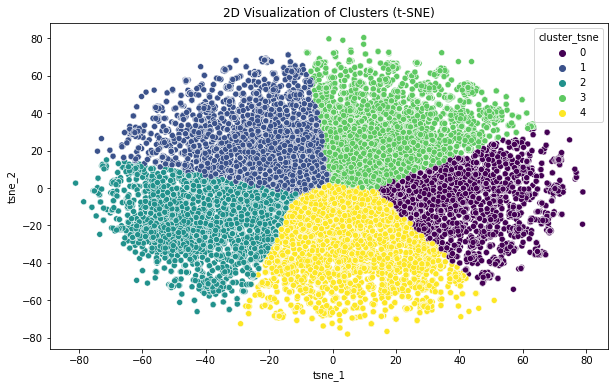

Silhouette Score for k=5 with t-SNE: 0.3305247724056244
Cluster 0 (t-SNE): home, away, come, time, believe, know, dream, heart, hold, long
Cluster 1 (t-SNE): better, black, heart, mind, come, time, like, know, gon, na
Cluster 2 (t-SNE): bitch, money, shit, right, na, know, yeah, fuck, nigga, like
Cluster 3 (t-SNE): time, break, world, leave, live, life, know, fall, go, heart
Cluster 4 (t-SNE): sing, like, want, come, good, baby, know, feel, away, time
sentiment     negative  neutral  positive
cluster_tsne                             
0                 1265       88      3489
1                 2666      109      2717
2                 2617      108      2691
3                 2531      143      3523
4                 2058      139      4228


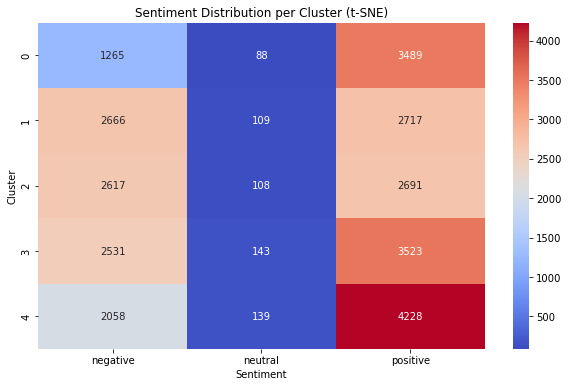

In [ ]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_tsne', palette='viridis', data=lyrics_df, legend='full')
plt.title('2D Visualization of Clusters (t-SNE)')
plt.show()

silhouette_avg_tsne = silhouette_score(tsne_results, lyrics_df['cluster_tsne'])
print(f'Silhouette Score for k={optimal_k} with t-SNE: {silhouette_avg_tsne}')

terms = tfidf_vectorizer.get_feature_names()

def get_top_terms_per_cluster(tfidf_matrix, labels, terms, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.toarray()).groupby(labels).mean()
    top_terms = {}
    for i, row in df.iterrows():
        top_terms[i] = [terms[t] for t in np.argsort(row)[-n_terms:]]
    return top_terms

top_terms_tsne = get_top_terms_per_cluster(tfidf_matrix, lyrics_df['cluster_tsne'], terms)

for cluster, terms in top_terms_tsne.items():
    print(f"Cluster {cluster} (t-SNE): {', '.join(terms)}")

sentiment_distribution_tsne = lyrics_df.groupby(['cluster_tsne', 'sentiment']).size().unstack(fill_value=0)

print(sentiment_distribution_tsne)

# Plot sentiment distribution per cluster
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_distribution_tsne, annot=True, cmap="coolwarm", fmt="d")
plt.title('Sentiment Distribution per Cluster (t-SNE)')
plt.xlabel('Sentiment')
plt.ylabel('Cluster')
plt.show()



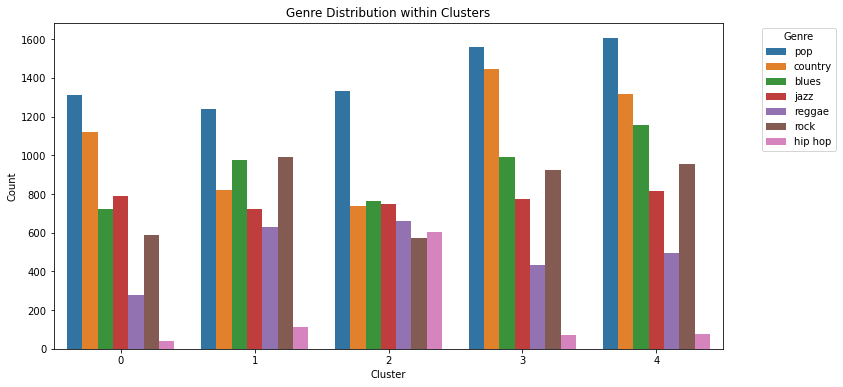

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_tsne', hue='genre', data=lyrics_df)
plt.title('Genre Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


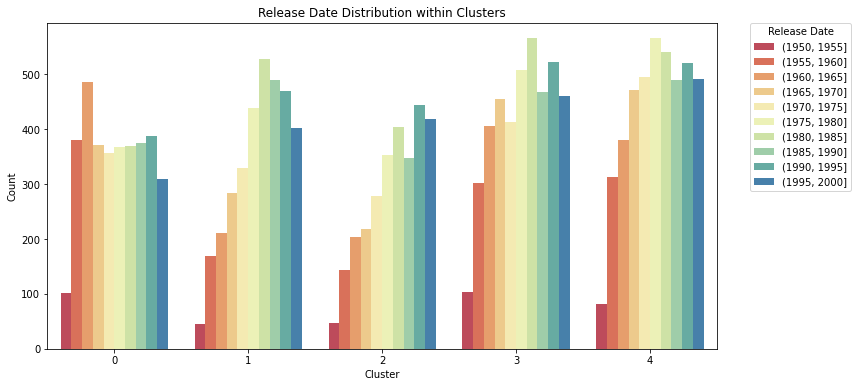

In [ ]:
lyrics_df['release_date_grouped'] = pd.cut(lyrics_df['release_date'], bins=np.arange(1950, 2001, 5))

plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_tsne', hue='release_date_grouped', data=lyrics_df, palette='Spectral')
plt.title('Release Date Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.legend(title='Release Date', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.show()

### Result Summary and comparison of performance of PCA vs t-SNE dimensionality reduction


• The t-SNE visualization shows clear cluster separation in 2D space, indicating effective dimensionality reduction while preserving cluster structure. Clusters appear more distinct than in PCA visualization.

• The silhouette score improved from 0.0028 (PCA) to 0.3325 (t-SNE) for k=5, suggesting better-defined clusters with t-SNE.

• Top terms per cluster reveal thematic content. For example, Cluster 0 relates to place and time, while Cluster 2 contains more explicit content.

• The sentiment distribution heatmap shows varying sentiment patterns across clusters, with some clusters showing a predominance of certain sentiments.

• The elbow plot suggests k=5 is reasonable, as increasing clusters doesn't significantly improve clustering quality.

• Overall, t-SNE provided improved clustering with higher silhouette score, clearer visualization, and thematic content aligning well with sentiment distribution.

### Conclusion

The project successfully demonstrated the use of NLP techniques and clustering algorithms to analyze and visualize the sentiment and thematic content of music lyrics. The t-SNE approach combined with K-Means provided well-defined clusters and valuable insights into the sentiment distribution and thematic content of the songs.